Код, позволяющий обратиться к API кинопоиска (неоф.), получить сведения, обработать их и привести к удобной таблице, с которой в последствии можно работать, строить графики.
Внимание! Необходимо изначально получить токен в телеграм-боте @kinopoiskdev_bot, документация по API https://api.kinopoisk.dev/documentation.


In [99]:
import requests
from pprint import pprint
import pandas as pd
import json
import numpy as np

# Создаем запрос сведений о фильмах за определенный год (года) через API кинопоиск (неоф.)

headers = {'X-API-KEY': 'ВАШ ТОКЕН'}
def get_movies_by_year(year, page = 1, limit = 100):
    response = requests.get(
        'https://api.kinopoisk.dev/v1.4/movie',
        params={
            'selectFields': ['id', 'name', 'year', 'rating', 'ageRating', 'budget', 'genres', 'countries', 'fees'],           
            'notNullFields': ['ageRating'],
            'notNullFields': ['fees.world.value'],
            'notNullFields': ['fees.world.currency'],
            'notNullFields': ['budget.value'],
            'notNullFields': ['budget.currency'],
            'notNullFields': ['rating.imdb'],
            'rating.imdb': '7-10',
            'year': year,
            'limit': limit,
            'page': page,
        },
        headers=headers
    )
    movies = response.json()
    return movies['docs']

year = (2020, 2021, 2022, 2023)
movies = get_movies_by_year(year)
pprint(movies)

[{'ageRating': 18,
  'budget': {'currency': '$', 'value': 40000000},
  'countries': [{'name': 'Великобритания'}, {'name': 'США'}],
  'fees': {'russia': {'currency': '$', 'value': 13318455},
           'usa': {'currency': '$', 'value': 27466489},
           'world': {'currency': '$', 'value': 103966489}},
  'genres': [{'name': 'боевик'}, {'name': 'триллер'}],
  'id': 1318972,
  'name': 'Гнев человеческий',
  'rating': {'await': None,
             'filmCritics': 6.3,
             'imdb': 7.1,
             'kp': 7.608,
             'russianFilmCritics': 72.973},
  'year': 2021},
 {'ageRating': 18,
  'budget': {},
  'countries': [{'name': 'Россия'}],
  'fees': {'russia': {}, 'usa': {}, 'world': {}},
  'genres': [{'name': 'драма'}, {'name': 'фэнтези'}],
  'id': 4647040,
  'name': 'Король и Шут',
  'rating': {'await': None,
             'filmCritics': 0,
             'imdb': 7.1,
             'kp': 8.189,
             'russianFilmCritics': 100},
  'year': 2023},
 {'ageRating': 18,
  'budget'

In [102]:
# Создаем датафрейм для pd

df = pd.json_normalize(movies)
df

,id,name,year,genres,countries,ageRating,rating.kp,rating.imdb,rating.filmCritics,rating.russianFilmCritics,rating.await,budget.value,budget.currency,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,fees.usa.currency
0,1318972,Гнев человеческий,2021,"[{'name': 'боевик'}, {'name': 'триллер'}]","[{'name': 'Великобритания'}, {'name': 'США'}]",18.0,7.608,7.1,6.3,72.9730,None,40000000.0,$,103966489.0,$,13318455.0,$,27466489.0,$
1,4647040,Король и Шут,2023,"[{'name': 'драма'}, {'name': 'фэнтези'}]",[{'name': 'Россия'}],18.0,8.189,7.1,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,927898,Переводчик,2022,"[{'name': 'боевик'}, {'name': 'триллер'}, {'na...","[{'name': 'Великобритания'}, {'name': 'Испания...",18.0,7.890,7.5,6.8,87.5000,None,55000000.0,$,21632392.0,$,3527720.0,$,16938039.0,$
3,409424,Дюна,2021,"[{'name': 'фантастика'}, {'name': 'боевик'}, {...","[{'name': 'США'}, {'name': 'Канада'}, {'name':...",12.0,7.671,8.0,7.6,72.0000,None,165000000.0,$,402027830.0,$,21931316.0,$,108327830.0,$
4,1392743,Постучись в мою дверь,2020,"[{'name': 'мелодрама'}, {'name': 'комедия'}]",[{'name': 'Турция'}],18.0,8.109,7.3,0.0,0.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1203040,Ванда/Вижн,2021,"[{'name': 'фантастика'}, {'name': 'фэнтези'}, ...",[{'name': 'США'}],NaN,7.448,7.9,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1112513,Властелин колец: Кольца власти,2022,"[{'name': 'фэнтези'}, {'name': 'боевик'}, {'na...",[{'name': 'США'}],NaN,6.214,7.0,0.0,50.0000,None,715000000.0,$,NaN,NaN,NaN,NaN,NaN,NaN
97,4360157,Хрустальный,2021,"[{'name': 'детектив'}, {'name': 'триллер'}, {'...",[{'name': 'Россия'}],18.0,8.075,7.8,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2043233,Красавица и дракон,2021,"[{'name': 'аниме'}, {'name': 'мультфильм'}, {'...",[{'name': 'Япония'}],12.0,7.732,7.1,7.9,86.6667,None,NaN,NaN,66766529.0,$,597156.0,$,4018313.0,$


In [165]:
# Развернем встроенные таблицы в столбцах genres и countries

genres_with_id = pd.json_normalize(movies, record_path='genres', meta='id', record_prefix='genres.', errors="ignore")

In [105]:
genres_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genres.name  326 non-null    object
 1   id           326 non-null    object
dtypes: object(2)
memory usage: 5.2+ KB


In [111]:
df_copy = df.copy()
df_copy.drop(['genres'], axis='columns', inplace=True)

In [126]:
genres_with_id_grouped = genres_with_id.groupby(['id'], as_index= False ).agg({'genres.name': ', '. join })

In [127]:
genres_with_id_grouped

,id,genres.name
0,409424,"фантастика, боевик, драма, приключения"
1,420454,"фантастика, триллер, детектив"
2,478052,"комедия, приключения, фэнтези"
3,505898,"фантастика, фэнтези, боевик, приключения"
4,572032,"боевик, драма"
...,...,...
95,4716622,"документальный, семейный"
96,4948328,ужасы
97,5019944,"фантастика, комедия"
98,5189169,"детский, мультфильм, короткометражка"


In [150]:
summary = df_copy.merge(genres_with_id_grouped, how='outer', on='id')
summary

,id,name,year,ageRating,rating.kp,rating.imdb,rating.filmCritics,rating.russianFilmCritics,rating.await,budget.value,budget.currency,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,fees.usa.currency,genres.name
0,1318972,Гнев человеческий,2021,18.0,7.608,7.1,6.3,72.9730,None,40000000.0,$,103966489.0,$,13318455.0,$,27466489.0,$,"боевик, триллер"
1,4647040,Король и Шут,2023,18.0,8.189,7.1,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"драма, фэнтези"
2,927898,Переводчик,2022,18.0,7.890,7.5,6.8,87.5000,None,55000000.0,$,21632392.0,$,3527720.0,$,16938039.0,$,"боевик, триллер, военный, история, драма"
3,409424,Дюна,2021,12.0,7.671,8.0,7.6,72.0000,None,165000000.0,$,402027830.0,$,21931316.0,$,108327830.0,$,"фантастика, боевик, драма, приключения"
4,1392743,Постучись в мою дверь,2020,18.0,8.109,7.3,0.0,0.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"мелодрама, комедия"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1203040,Ванда/Вижн,2021,NaN,7.448,7.9,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"фантастика, фэнтези, боевик, драма, мелодрама,..."
96,1112513,Властелин колец: Кольца власти,2022,NaN,6.214,7.0,0.0,50.0000,None,715000000.0,$,NaN,NaN,NaN,NaN,NaN,NaN,"фэнтези, боевик, драма, приключения"
97,4360157,Хрустальный,2021,18.0,8.075,7.8,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"детектив, триллер, драма, криминал"
98,2043233,Красавица и дракон,2021,12.0,7.732,7.1,7.9,86.6667,None,NaN,NaN,66766529.0,$,597156.0,$,4018313.0,$,"аниме, мультфильм, фантастика, драма, музыка"


In [130]:
countries_with_id = pd.json_normalize(movies, record_path='countries', meta='id', record_prefix='countries.', errors="ignore")

In [133]:
countries_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   countries.name  163 non-null    object
 1   id              163 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [136]:
summary.drop(['countries'], axis='columns', inplace=True)

In [134]:
countries_with_id_grouped = countries_with_id.groupby(['id'], as_index= False ).agg({'countries.name': ', '. join })

In [151]:
countries_with_id_grouped

,id,countries.name
0,409424,"США, Канада, Венгрия"
1,420454,"США, Канада, Австралия"
2,478052,"США, Великобритания"
3,505898,США
4,572032,США
...,...,...
95,4716622,"Великобритания, США"
96,4948328,"Австралия, Великобритания"
97,5019944,Россия
98,5189169,Россия


In [152]:
df_to_work = summary.merge(countries_with_id_grouped, how='outer', on='id')
df_to_work

,id,name,year,ageRating,rating.kp,rating.imdb,rating.filmCritics,rating.russianFilmCritics,rating.await,budget.value,budget.currency,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,fees.usa.currency,genres.name,countries.name
0,1318972,Гнев человеческий,2021,18.0,7.608,7.1,6.3,72.9730,None,40000000.0,$,103966489.0,$,13318455.0,$,27466489.0,$,"боевик, триллер","Великобритания, США"
1,4647040,Король и Шут,2023,18.0,8.189,7.1,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"драма, фэнтези",Россия
2,927898,Переводчик,2022,18.0,7.890,7.5,6.8,87.5000,None,55000000.0,$,21632392.0,$,3527720.0,$,16938039.0,$,"боевик, триллер, военный, история, драма","Великобритания, Испания, США"
3,409424,Дюна,2021,12.0,7.671,8.0,7.6,72.0000,None,165000000.0,$,402027830.0,$,21931316.0,$,108327830.0,$,"фантастика, боевик, драма, приключения","США, Канада, Венгрия"
4,1392743,Постучись в мою дверь,2020,18.0,8.109,7.3,0.0,0.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"мелодрама, комедия",Турция
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1203040,Ванда/Вижн,2021,NaN,7.448,7.9,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"фантастика, фэнтези, боевик, драма, мелодрама,...",США
96,1112513,Властелин колец: Кольца власти,2022,NaN,6.214,7.0,0.0,50.0000,None,715000000.0,$,NaN,NaN,NaN,NaN,NaN,NaN,"фэнтези, боевик, драма, приключения",США
97,4360157,Хрустальный,2021,18.0,8.075,7.8,0.0,100.0000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"детектив, триллер, драма, криминал",Россия
98,2043233,Красавица и дракон,2021,12.0,7.732,7.1,7.9,86.6667,None,NaN,NaN,66766529.0,$,597156.0,$,4018313.0,$,"аниме, мультфильм, фантастика, драма, музыка",Япония


In [166]:
# Сформируем датасет для работы, поменяем столбцы местами, оставим интересующие нас столбцы

df_to_work_cut = df_to_work[['id', 'name', 'year', 'rating.imdb', 'genres.name', 'countries.name', 'budget.value', 'budget.currency', 'fees.world.value', 'fees.world.currency', 'fees.russia.value', 'fees.russia.currency', 'fees.usa.value',	'fees.usa.currency']]
df_to_work_cut

,id,name,year,rating.imdb,genres.name,countries.name,budget.value,budget.currency,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,fees.usa.currency
0,1318972,Гнев человеческий,2021,7.1,"боевик, триллер","Великобритания, США",40000000.0,$,103966489.0,$,13318455.0,$,27466489.0,$
1,4647040,Король и Шут,2023,7.1,"драма, фэнтези",Россия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,927898,Переводчик,2022,7.5,"боевик, триллер, военный, история, драма","Великобритания, Испания, США",55000000.0,$,21632392.0,$,3527720.0,$,16938039.0,$
3,409424,Дюна,2021,8.0,"фантастика, боевик, драма, приключения","США, Канада, Венгрия",165000000.0,$,402027830.0,$,21931316.0,$,108327830.0,$
4,1392743,Постучись в мою дверь,2020,7.3,"мелодрама, комедия",Турция,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1203040,Ванда/Вижн,2021,7.9,"фантастика, фэнтези, боевик, драма, мелодрама,...",США,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1112513,Властелин колец: Кольца власти,2022,7.0,"фэнтези, боевик, драма, приключения",США,715000000.0,$,NaN,NaN,NaN,NaN,NaN,NaN
97,4360157,Хрустальный,2021,7.8,"детектив, триллер, драма, криминал",Россия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2043233,Красавица и дракон,2021,7.1,"аниме, мультфильм, фантастика, драма, музыка",Япония,NaN,NaN,66766529.0,$,597156.0,$,4018313.0,$


In [154]:
# Проверим, фильмы каких стран получили наибольшие сборы в мире (топ-10), из имеющихся в датасете.

fees_to_countries = df_to_work_cut.groupby('countries.name')['fees.world.value'].sum()
fees_to_countries
fees_to_countries.sort_values(ascending=False)[:10]

countries.name
США                                     8.948863e+09
США, Великобритания                     2.627340e+09
Великобритания, США                     1.300357e+09
США, Япония                             1.068553e+09
США, Новая Зеландия, Франция, Канада    8.455558e+08
США, Канада                             5.559837e+08
США, Германия                           4.796049e+08
США, Канада, Венгрия                    4.020278e+08
Индия                                   1.501218e+08
США, Канада, Австралия                  1.444927e+08
Name: fees.world.value, dtype: float64

In [155]:
# Найдем самый дорогой по бюджету фильм в имеющемся датасете.

top_1 = df_to_work_cut.copy()
top_1
top_1.sort_values('budget.value', ascending=False)[:1]

,id,name,year,rating.imdb,genres.name,countries.name,budget.value,budget.currency,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,fees.usa.currency
96,1112513,Властелин колец: Кольца власти,2022,7.0,"фэнтези, боевик, драма, приключения",США,715000000.0,$,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='year'>

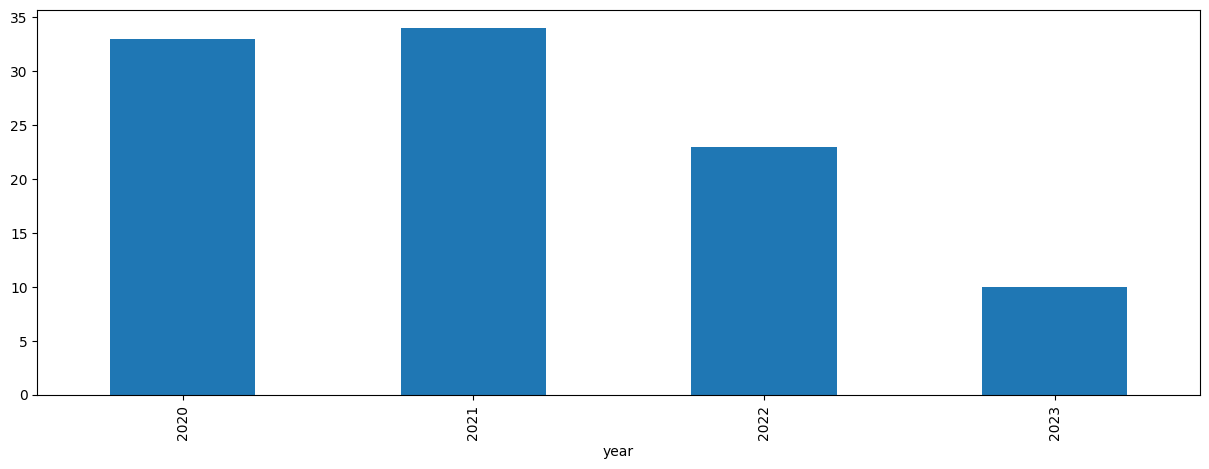

In [158]:
# Сравним количество фильмов, попавших в наш датасет, по годам

df_to_work_cut['year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))

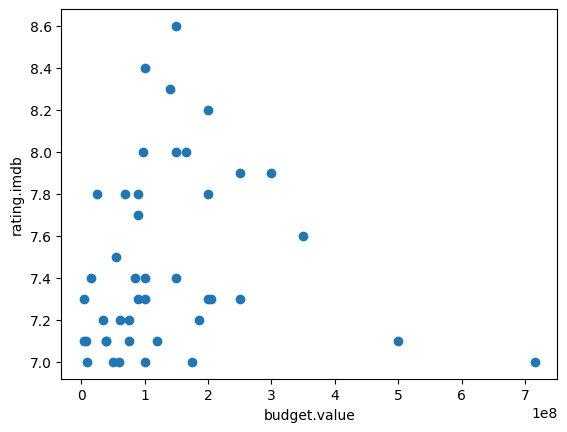

In [167]:
# Проверим, есть ли взаимосвязь между размером бюджета фильма и рейтингом iMDb

import matplotlib.pyplot as plt
plt.scatter(df_to_work_cut['budget.value'], df_to_work_cut['rating.imdb'])
plt.ylabel('rating.imdb')
plt.xlabel('budget.value')
plt.show()